# NE 452 Assignment 2
## Anissh Vivekanand, 20661982
## Feb 2, 2022

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [20]:
def autocorrelation(time_series):
    time_steps = len(time_series)
    autocorrelation = []

    A_avg = np.mean(time_series)
    for i in range(time_steps):
        if i == 0:
            intermediate_acf = []
            for x in time_series:
                acf = (x - A_avg)*(x - A_avg)
                intermediate_acf.append(acf)
            autocorrelation.append(np.mean(intermediate_acf))
        else:
            intermediate_acf = []
            for j in range(0, time_steps-i, i):
                A_0 = time_series[j]
                A_t = time_series[j+i]

                acf = (A_0 - A_avg)*(A_t - A_avg)
                intermediate_acf.append(acf)
            autocorrelation.append(np.mean(intermediate_acf))
    
    lower = -1
    upper = 1
    width = upper - lower
    normalized_acf = (autocorrelation - np.min(autocorrelation))/(np.max(autocorrelation) - np.min(autocorrelation))*width + lower
    
    return normalized_acf


In [21]:
#Q1b
data_1b = np.load('HO_v.npy')

In [22]:
#Q1b
data_1b_acf = autocorrelation(data_1b)
indices_1b = [x+1 for x in range(len(data_1b_acf))]

C:\Users\aniss\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 't')

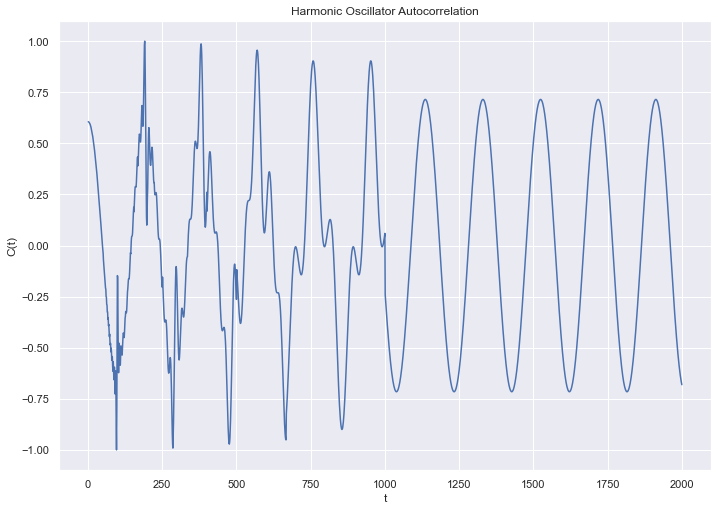

In [23]:
ax = sns.lineplot(indices_1b, data_1b_acf)
ax.set_title('Harmonic Oscillator Autocorrelation')
ax.set_ylabel('C(t)')
ax.set_xlabel('t')

In [24]:
#Q1c
data_1c = np.load('ar2_v.npy')
data_1c_acf = autocorrelation(data_1c)
indices_1c = [x+1 for x in range(len(data_1c_acf))]

C:\Users\aniss\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 't')

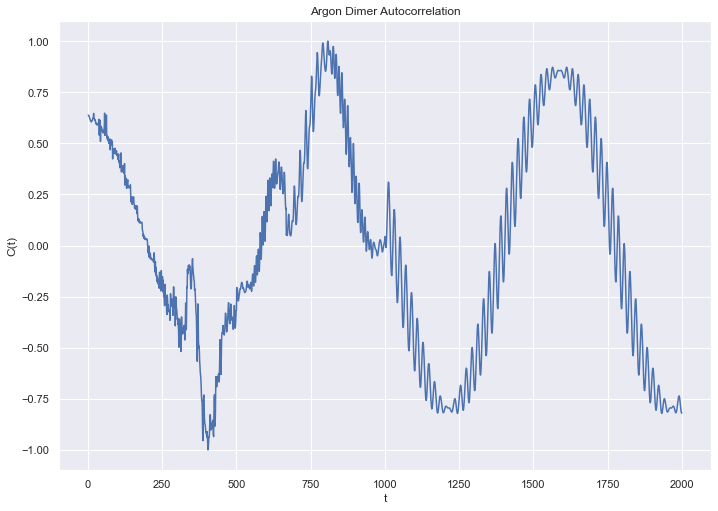

In [25]:
ax = sns.lineplot(indices_1c, data_1c_acf)
ax.set_title('Argon Dimer Autocorrelation')
ax.set_ylabel('C(t)')
ax.set_xlabel('t')

In [26]:
#Q1d
data_1d = np.load('ar_box_v.npy')
data_1d_acf = autocorrelation(data_1d)
indices_1d = [x+1 for x in range(len(data_1d_acf))]

C:\Users\aniss\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 't')

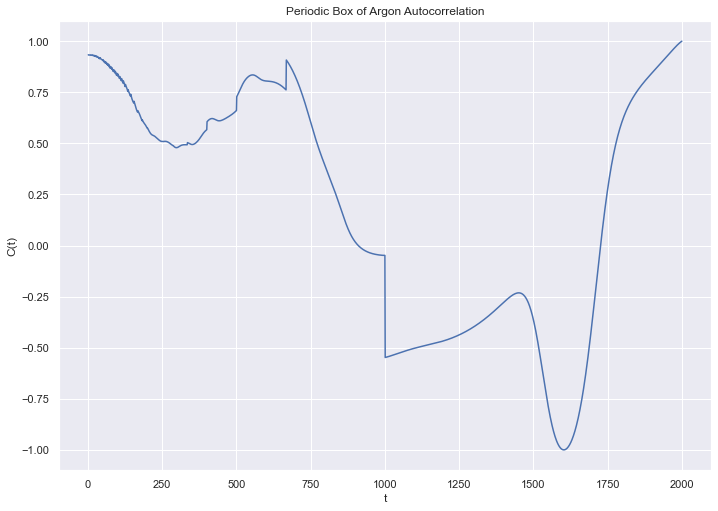

In [27]:
ax = sns.lineplot(indices_1d, data_1d_acf)
ax.set_title('Periodic Box of Argon Autocorrelation')
ax.set_ylabel('C(t)')
ax.set_xlabel('t')

In [28]:
#Q1e
n_1d = 1 + 2*(np.sum(data_1d_acf))
data_1e = [data_1d_acf[x] for x in range(0, len(data_1d_acf), int(n_1d))]
indices_1e = [x+1 for x in range(len(data_1e))]

C:\Users\aniss\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 't')

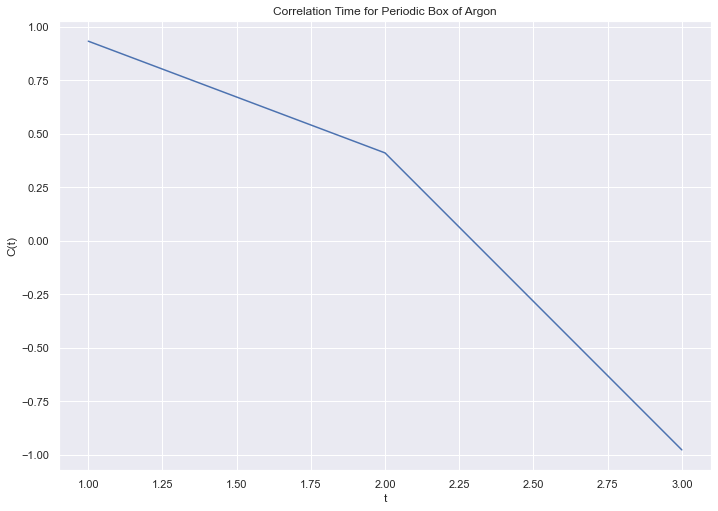

In [29]:
ax = sns.lineplot(indices_1e, data_1e)
ax.set_title('Correlation Time for Periodic Box of Argon')
ax.set_ylabel('C(t)')
ax.set_xlabel('t')

In [30]:
np.var(data_1e)/np.sqrt(len(indices_1e))

0.37543151115061596

In [31]:
#Q1f
def binner(time_series):
    error = []
    binning_level = []

    Nl_min = 30
    max_binning_level = int(len(time_series) / Nl_min)

    for i in range(1, max_binning_level+1):
        data = np.array(time_series)
        binned_data = np.array_split(data, i)
        binned_time_series = [np.mean(x) for x in binned_data]
        delta_l = np.var(binned_time_series)/np.sqrt(len(binned_time_series))
        error.append(delta_l)
        binning_level.append(i)
    
    return [error, binning_level]

In [32]:
data_1f = binner(data_1d_acf)[0]
indices_1f = binner(data_1d_acf)[1]

C:\Users\aniss\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'l')

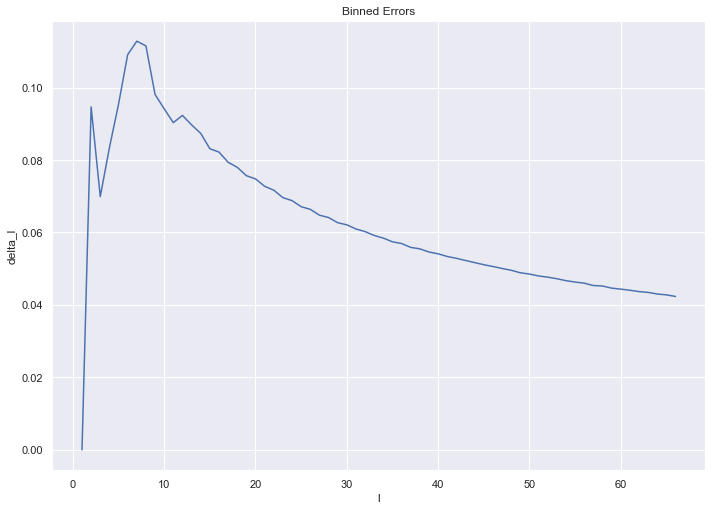

In [33]:
ax = sns.lineplot(indices_1f, data_1f)
ax.set_title('Binned Errors')
ax.set_ylabel('delta_l')
ax.set_xlabel('l')

In [18]:
# #Q2

# def volume(r, boundary):
#         # Calculate the volume of a sphere of radius r located at height z
#         volume = 4.0 / 3.0 * np.pi * r**3
        
#         # Cut off the volume if it extends beyond the cubic box
#         if r > boundary:
#             h = r - boundary
#             volume -= np.pi * h**2 * (r - h / 3.0)
        
#         return volume

# class Radial_Distribution:
#     def __init__(self, pair_distances, boundary, resolution):
#         self.data = pair_distances
#         self.boundary = boundary
#         self.timesteps = len(pair_distances)
#         self.resolution = resolution

#     def compute_particle_volume(self):
#         n_particles = 0
#         for step in range(self.timesteps):
#             for r in self.data[step]:
#                 if r < self.boundary:
#                     n_particles += 1
        
#         volume = self.boundary ** 3
#         average_particles = n_particles / self.timesteps
#         self.volume_per_particle = volume / average_particles
#         return

#     def radial_distribution_function(self):
#         r_max = self.boundary
#         dr = r_max / self.resolution

#         self.radii = np.linspace(0, self.resolution * dr, self.resolution)
#         volumes = np.zeros(self.resolution)
#         self.radial_distribution = np.zeros(self.resolution)

#         for step in range(self.timesteps):
#             for idx, r in enumerate(self.data[step]):
#                 for i in range(self.resolution):
#                     r1 = i * dr
#                     r2 = r1 + dr
#                     v1 = volume(r1, self.boundary)
#                     v2 = volume(r2, self.boundary)
#                     volumes[i] += v2 - v1
                
#                 for j in self.data[step][idx:]:
#                     index = int(j / dr)
#                     if 0 < index < self.resolution:
#                         self.radial_distribution[index] += 2.0
        
#         for i, value in enumerate(self.radial_distribution):
#             self.radial_distribution[i] = value * self.volume_per_particle / volumes[i]

#         return
    
#     def plot(self):
#         if not self.radial_distribution.any():
#             print('Compute the radial distribution function first \n')
#             return
        
#         plt.xlabel('r (Å)')
#         plt.ylabel('g$_{OO}$(r)')
#         plt.plot(self.radii, self.radial_distribution)
#         plt.show()
#         return

In [34]:
data_2a = np.load('ar_liquid_250_pairs.npy')

In [70]:
def normalize(data):
    normalized_data = []
    for i in data:
        normalized_data.append(i/np.max(data))
    return normalized_data


class Radial_Distribution:
    def __init__(self, pair_distances, particle_count, timesteps, box_length):
        self.data = pair_distances
        self.particle_count = particle_count
        self.timesteps = timesteps
        self.box_length = box_length
        self.boundary = box_length / 2.0
        self.volume = box_length ** 3
        self.density = particle_count / self.volume
    
    def histogram(self, resolution):
        hist_bins = np.arange(0, self.boundary, resolution)
        self.histogram, self.edges = np.histogram(self.data, hist_bins)
        self.r = (self.edges[:-1] + self.edges[1:])/2.0
        self.dr = self.edges[1] - self.edges[0]
        return
    
    def radial_distribution(self):
        self.shell_volume = 4*np.pi*self.r*self.dr
        self.radial_distribution = normalize(((self.histogram/(self.particle_count*self.shell_volume*self.density))/self.shell_volume)/self.density)
        return
    
    def nearest_neighbours_calculation(self, r_c):
        index = []
        for idx, r in enumerate(self.r):
            if r <= r_c:
                index.append(idx)
        
        gr_rc = [self.radial_distribution[i] for i in index]
        r_rc = [self.r[i] for i in index]

        self.nearest_neighbours = 4*np.pi*self.density*np.cumsum(gr_rc)*np.cumsum(np.square(r_rc))
        return

In [71]:
Liquid_Argon = Radial_Distribution(data_2a, 250, 1000, 2.14186)
Liquid_Argon.histogram(0.005)
Liquid_Argon.radial_distribution()

C:\Users\aniss\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'r')

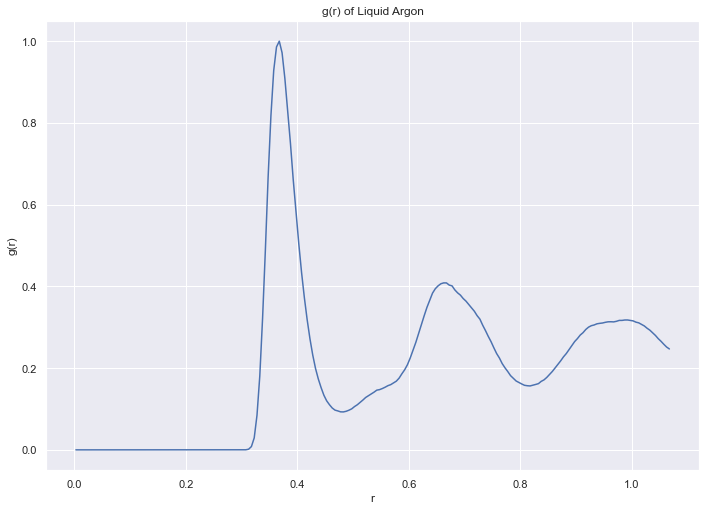

In [72]:
ax = sns.lineplot(Liquid_Argon.r, Liquid_Argon.radial_distribution)
ax.set_title('g(r) of Liquid Argon')
ax.set_ylabel('g(r)')
ax.set_xlabel('r')

In [73]:
Liquid_Argon.nearest_neighbours_calculation(0.51)
Liquid_Argon.nearest_neighbours[-1]

40237.098655367394

In [74]:
data_2b = np.load('ar_solid_500_pairs.npy')

In [75]:
Solid_Argon = Radial_Distribution(data_2b, 500, 1000, 2.35743)
Solid_Argon.histogram(0.005)
Solid_Argon.radial_distribution()

C:\Users\aniss\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'r')

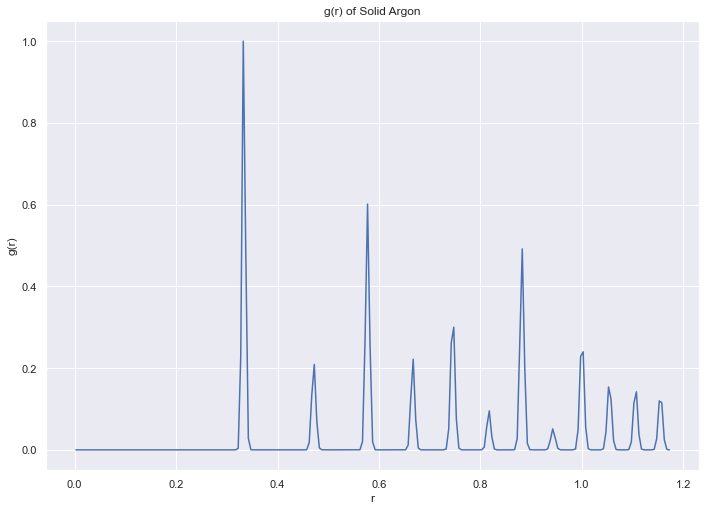

In [76]:
ax = sns.lineplot(Solid_Argon.r, Solid_Argon.radial_distribution)
ax.set_title('g(r) of Solid Argon')
ax.set_ylabel('g(r)')
ax.set_xlabel('r')

In [77]:
data_2ci = np.load('h2o_liquid_OO_pairs.npy')

In [78]:
H2O_Liquid_OO = Radial_Distribution(data_2ci, 501, 1000, 2.5)
H2O_Liquid_OO.histogram(0.005)
H2O_Liquid_OO.radial_distribution()

C:\Users\aniss\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'r')

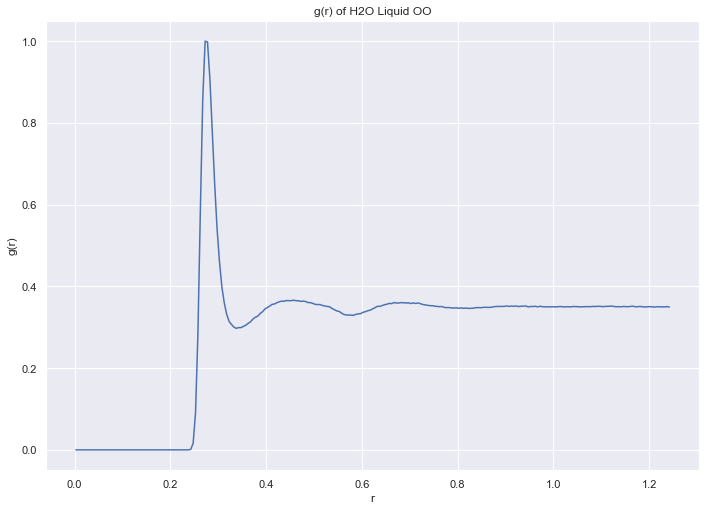

In [79]:
ax = sns.lineplot(H2O_Liquid_OO.r, H2O_Liquid_OO.radial_distribution)
ax.set_title('g(r) of H2O Liquid OO')
ax.set_ylabel('g(r)')
ax.set_xlabel('r')

In [80]:
data_2cii = np.load('h2o_liquid_OH_pairs.npy')

In [81]:
H2O_Liquid_OH = Radial_Distribution(data_2cii, 501, 1000, 2.5)
H2O_Liquid_OH.histogram(0.005)
H2O_Liquid_OH.radial_distribution()

C:\Users\aniss\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'r')

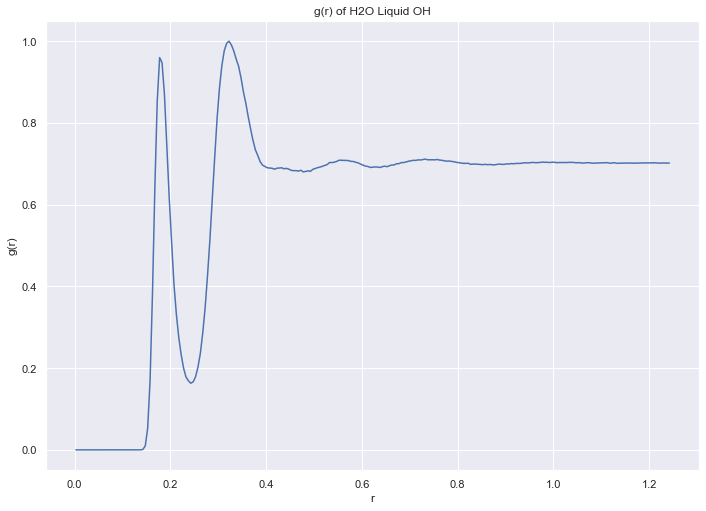

In [82]:
ax = sns.lineplot(H2O_Liquid_OH.r, H2O_Liquid_OH.radial_distribution)
ax.set_title('g(r) of H2O Liquid OH')
ax.set_ylabel('g(r)')
ax.set_xlabel('r')

In [83]:
H2O_Liquid_OO.nearest_neighbours_calculation(0.4725)
H2O_Liquid_OO.nearest_neighbours[-1]

51168.33517162782